In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

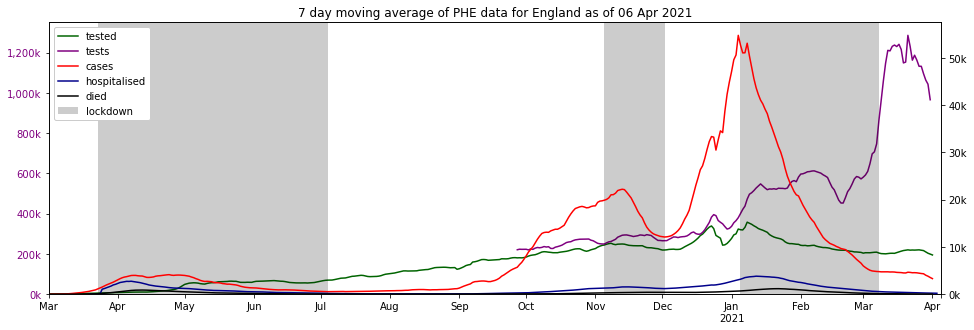

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

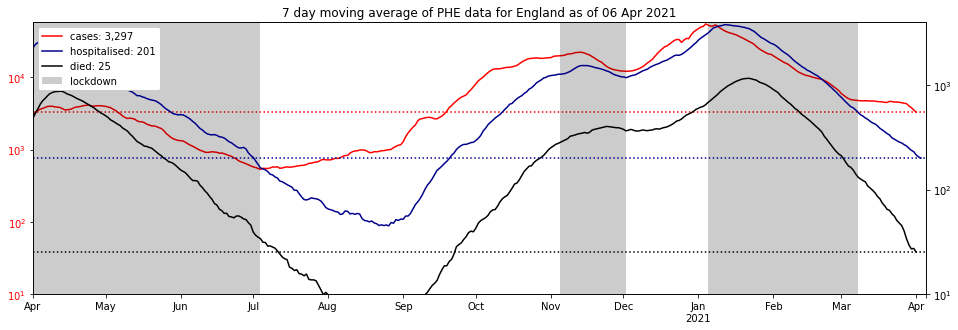

In [3]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

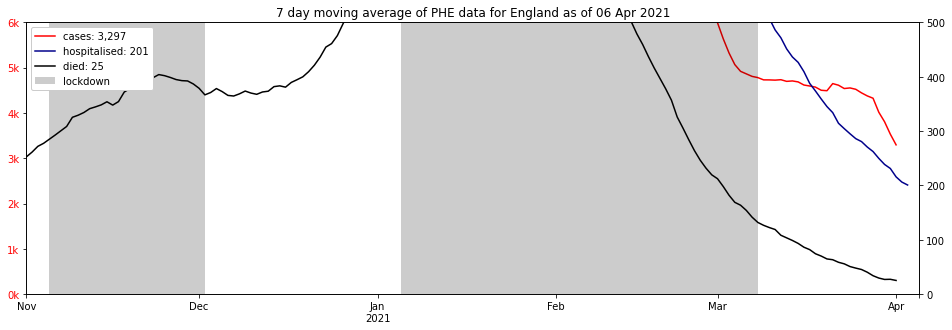

In [4]:
plot_summary(earliest_date='2020-11-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=6_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=500)

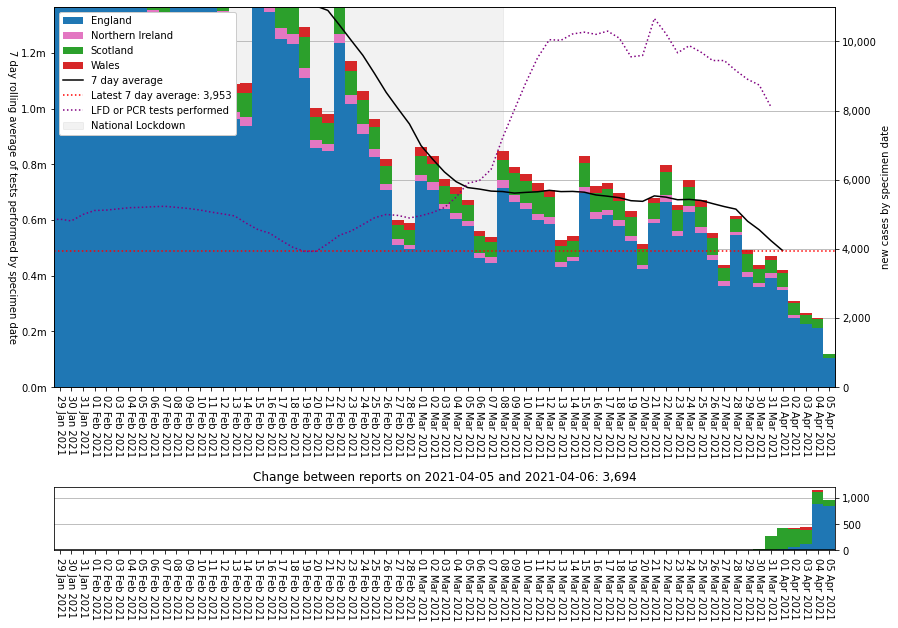

In [5]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,4398311.0,26765865.0,22367554.0,56286961,7.814085,39.738429,52.447486
1,Northern Ireland,N92000002,165374.0,785494.0,620120.0,1893667,8.733003,32.747046,58.519951
2,Scotland,S92000003,463780.0,2577816.0,2114036.0,5463300,8.489008,38.695221,52.815771
3,Wales,W92000004,469251.0,1493192.0,1023941.0,3152879,14.883254,32.476381,52.640365


'partial: 31,622,367 (47.3%), full: 5,496,716'

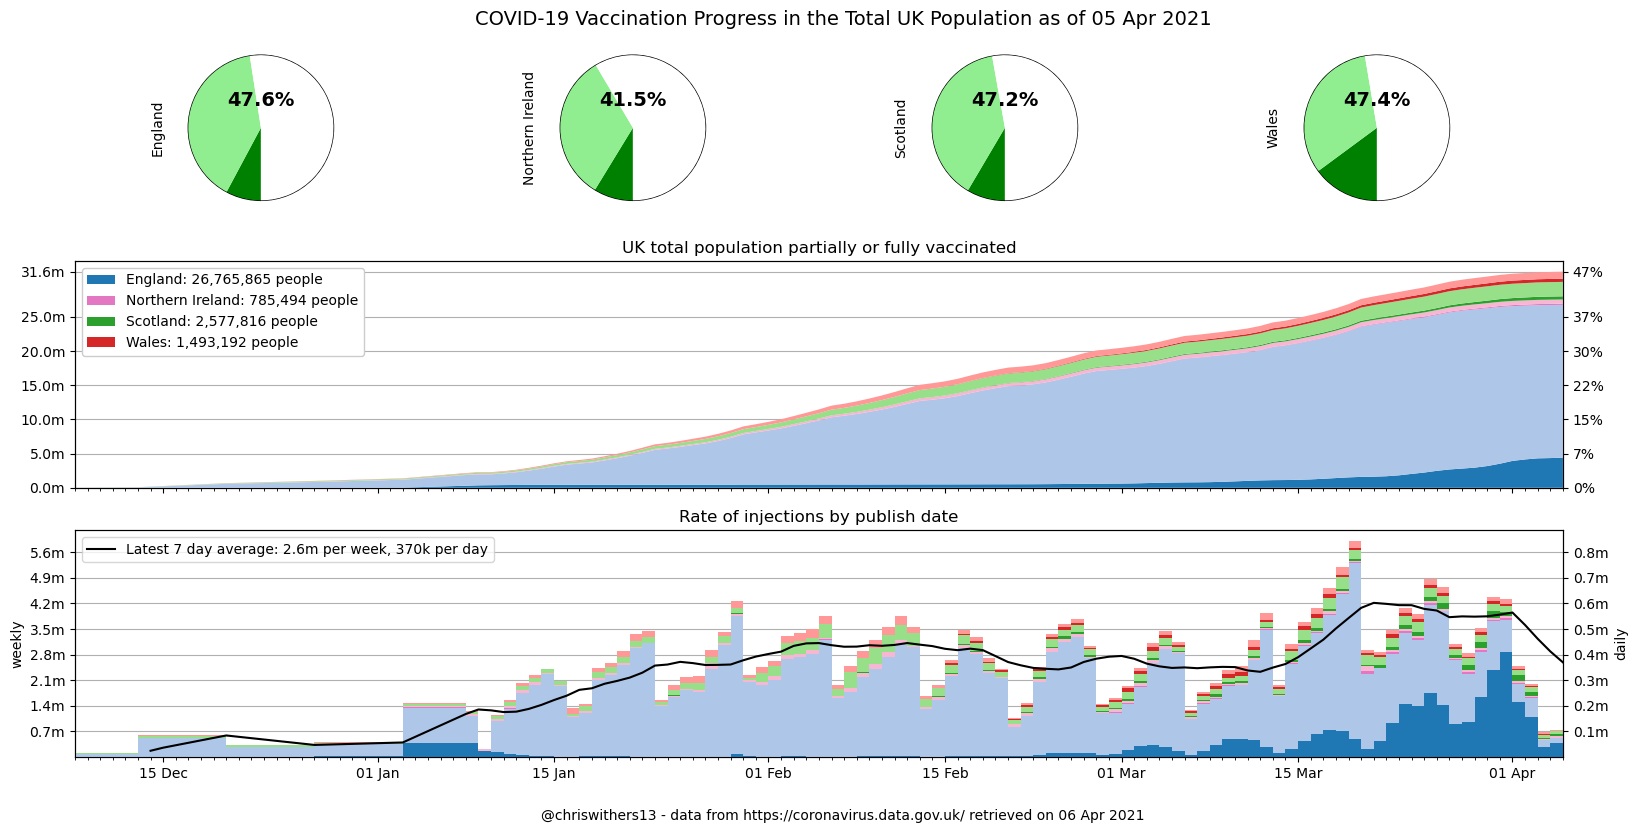

In [6]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [7]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,05 Apr 21,"+19,826","+54,060","+54,060","+26,765,865","+4,398,311","+4,398,311"
Northern Ireland,05 Apr 21,"+5,562","+1,556","+1,556","+785,494","+165,374","+165,374"
Scotland,05 Apr 21,"+12,536","+7,406","+7,406","+2,577,816","+463,780","+463,780"
Wales,05 Apr 21,"+2,820","+1,568","+1,568","+1,493,192","+469,251","+469,251"


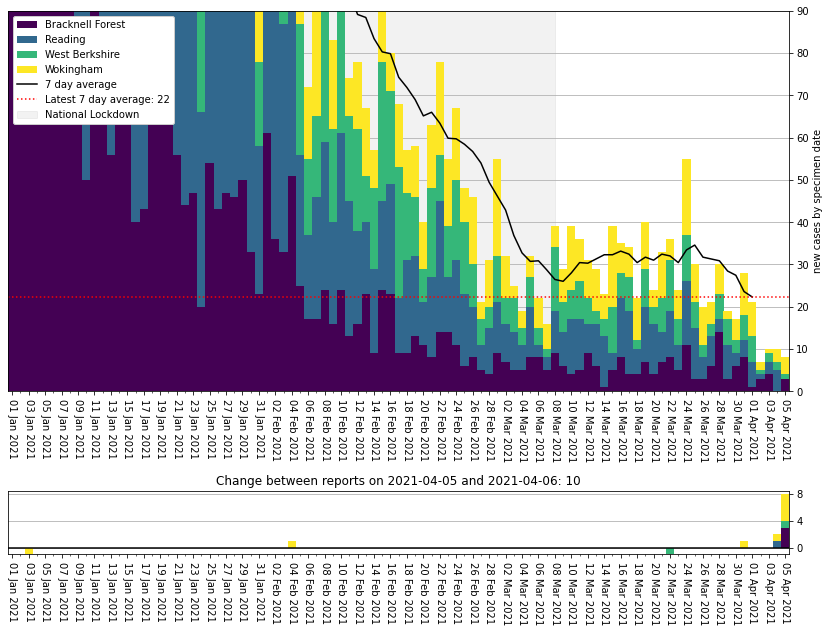

In [8]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=90)

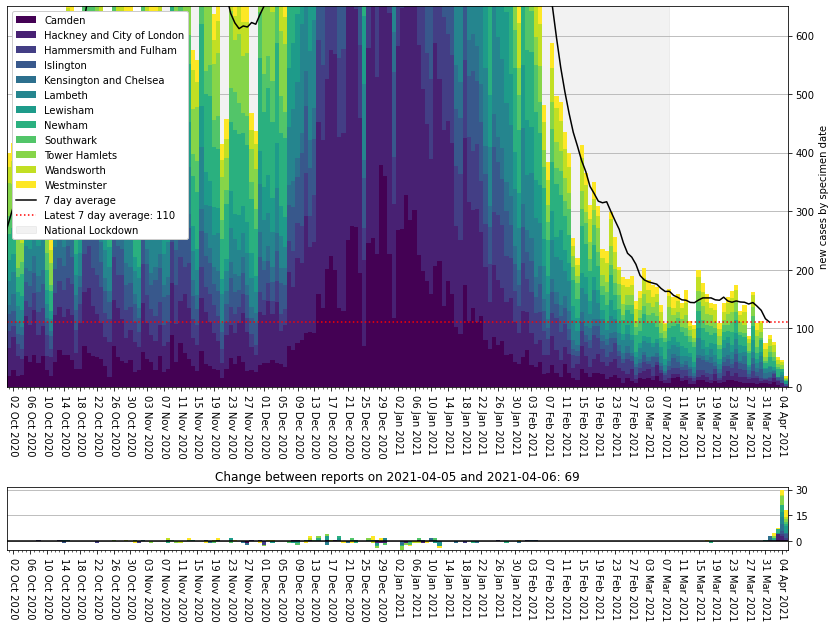

In [9]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000005,Clackmannanshire,161.039969,83.0,2021-04-05
E07000150,Corby,112.160403,81.0,2021-04-05
E07000174,Mansfield,101.543275,111.0,2021-04-05
E08000016,Barnsley,92.762875,229.0,2021-04-05
E08000036,Wakefield,90.723260,316.0,2021-04-05
E06000016,Leicester,77.916798,276.0,2021-04-05
S12000040,West Lothian,74.822501,137.0,2021-04-05
E06000032,Luton,73.221561,156.0,2021-04-05
E08000017,Doncaster,71.820193,224.0,2021-04-05


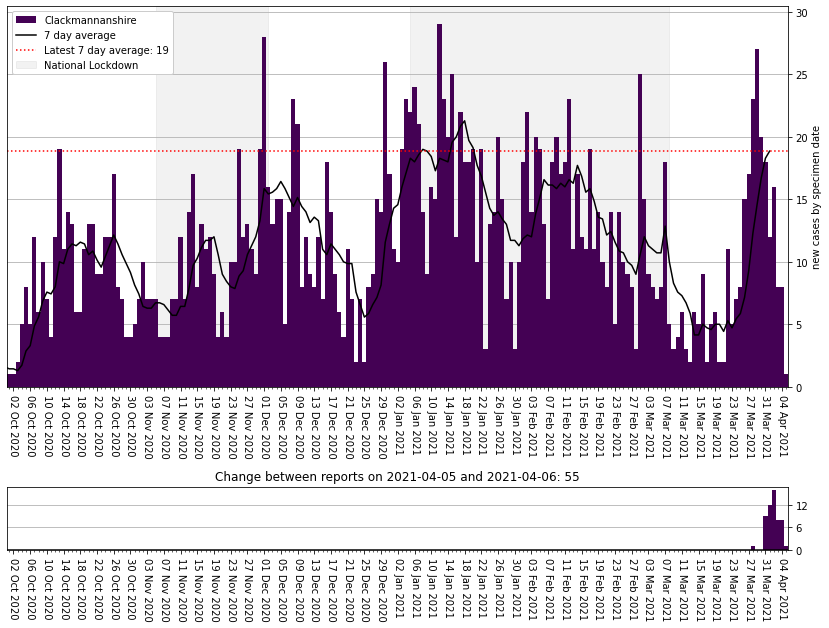

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,69.849043,554.0,2021-04-05
S12000049,Glasgow City,66.969927,424.0,2021-04-05
E08000019,Sheffield,69.419153,406.0,2021-04-05
E08000025,Birmingham,30.828084,352.0,2021-04-05
E08000032,Bradford,63.544878,343.0,2021-04-05
E08000036,Wakefield,90.723260,316.0,2021-04-05
E08000003,Manchester,51.369429,284.0,2021-04-05
E06000016,Leicester,77.916798,276.0,2021-04-05
E08000034,Kirklees,59.346911,261.0,2021-04-05


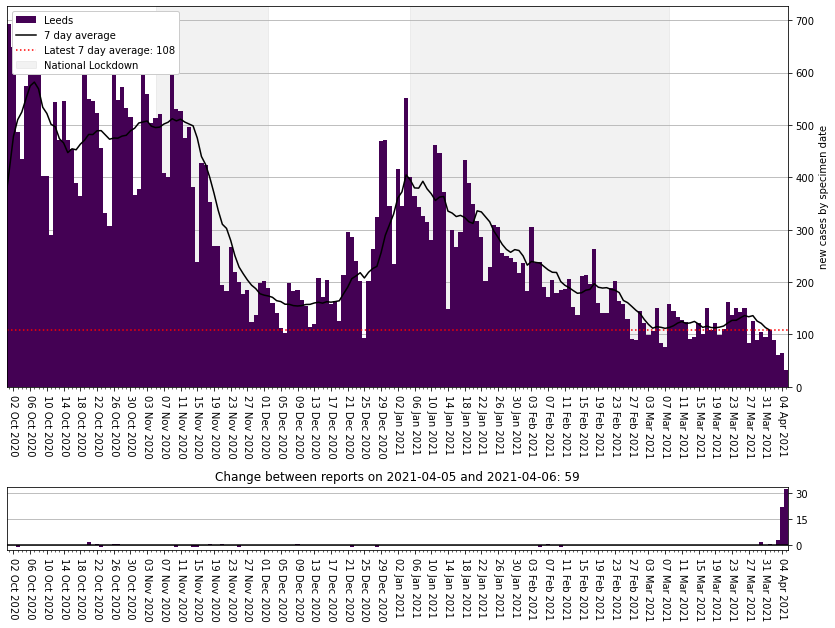

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [15]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.18

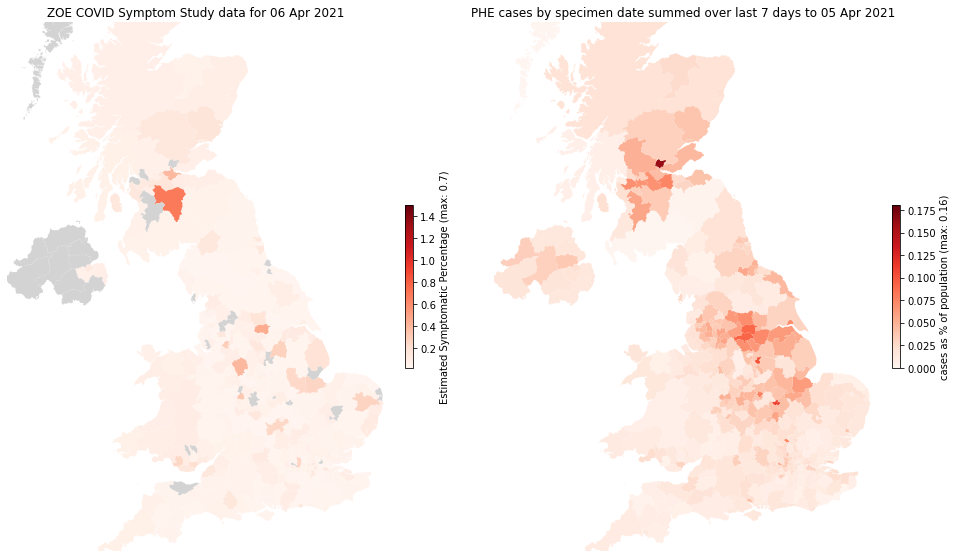

In [16]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [17]:


bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...